In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import plotly.express as px
from ipywidgets import interact, widgets

## Reading in the data

### Original data

In [2]:
original_data = pd.read_csv("data/world-happiness-report.csv")

In [3]:
original_data.shape

(1949, 11)

In [4]:
original_data = original_data.rename(columns={"Country name": "country"})

In [5]:
original_data.head()

,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


In [6]:
original_data.isna().sum()

country                               0
year                                  0
Life Ladder                           0
Log GDP per capita                   36
Social support                       13
Healthy life expectancy at birth     55
Freedom to make life choices         32
Generosity                           89
Perceptions of corruption           110
Positive affect                      22
Negative affect                      16
dtype: int64

### Geodata (region and continent)

In [7]:
countries = gpd.read_file('data/world-administrative-boundaries/world-administrative-boundaries.shp')

In [8]:
countries.shape

(256, 9)

In [9]:
countries = countries.rename(columns={"name": "country"})

In [10]:
countries.head()

,iso3,status,color_code,country,continent,region,iso_3166_1_,french_shor,geometry
0,UGA,Member State,UGA,Uganda,Africa,Eastern Africa,UG,Ouganda,"POLYGON ((33.92110 -1.00194, 33.92027 -1.00111..."
1,UZB,Member State,UZB,Uzbekistan,Asia,Central Asia,UZ,Ouzbékistan,"POLYGON ((70.97081 42.25467, 70.98054 42.26205..."
2,IRL,Member State,IRL,Ireland,Europe,Northern Europe,IE,Irlande,"MULTIPOLYGON (((-9.97014 54.02083, -9.93833 53..."
3,ERI,Member State,ERI,Eritrea,Africa,Eastern Africa,ER,Érythrée,"MULTIPOLYGON (((40.13583 15.75250, 40.12861 15..."
4,None,UK Territory,GBR,South Georgia & the South Sandwich Islands,Antarctica,None,None,South Georgia & the South Sandwich Islands,"MULTIPOLYGON (((-26.24361 -58.49473, -26.24889..."


### Population density

In [11]:
#!pip install xlrd

In [12]:
pop_density = pd.read_excel("data/API_EN.POP.DNST_DS2_en_excel_v2_5997992 (population density).xls", skiprows = 3)

In [13]:
pop_density.shape

(266, 67)

Keeping only the data from 2005 - 2020.

In [14]:
pop_density = pop_density.drop(pop_density.loc[:, 'Country Code':'2004'].columns,axis = 1)
pop_density = pop_density.drop(pop_density.loc[:, '2021':'2022'].columns,axis = 1)

In [15]:
pop_density = pop_density.rename(columns={"Country Name": "country"})

In [16]:
pop_density.head()

,country,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,524.905556,531.144444,537.705556,544.422222,551.177778,557.450000,562.711111,567.288889,571.555556,575.522222,579.205556,582.633333,585.772222,588.677778,591.344444,592.138889
1,Africa Eastern and Southern,31.056148,31.895464,32.771564,33.678052,34.606057,35.558806,36.531852,37.219640,38.254520,39.316203,40.417928,41.520571,42.623255,43.769082,44.946930,46.150813
2,Afghanistan,37.427274,39.009159,39.714979,40.518221,41.987193,43.220447,44.844851,46.711251,48.359028,50.160542,51.750915,53.104284,54.648541,56.248231,57.908252,59.752281
3,Africa Western and Central,34.250759,35.221007,36.217202,37.243205,38.302415,39.392707,40.514937,41.654561,42.804993,43.982443,45.180225,46.405991,47.661860,48.934069,50.222984,51.536679
4,Angola,15.601956,16.172568,16.772025,17.399151,18.053801,18.740824,19.458660,20.203972,20.972970,21.760116,22.561740,23.385535,24.230872,25.085051,25.951382,26.813577


### Suicide rate

In [17]:
suicide_rate = pd.read_excel("data/API_SH.STA.SUIC.P5_DS2_en_excel_v2_5998264 (suicide rate).xls", skiprows = 3)

In [18]:
suicide_rate.shape

(266, 67)

Keeping only the data from 2005 - 2020.

In [19]:
suicide_rate = suicide_rate.drop(suicide_rate.loc[:, 'Country Code':'2004'].columns,axis = 1)
suicide_rate = suicide_rate.drop(suicide_rate.loc[:, '2021':'2022'].columns,axis = 1)

In [20]:
suicide_rate = suicide_rate.rename(columns={"Country Name": "country"})

In [21]:
suicide_rate.head()

,country,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,9.900247,9.729664,9.686305,9.910591,9.863978,9.472227,9.063319,8.856540,8.745026,8.565287,8.489758,8.328658,8.232943,8.118032,8.024906,NaN
2,Afghanistan,5.000000,4.900000,4.800000,4.600000,4.400000,4.300000,4.100000,4.000000,4.000000,3.900000,4.000000,4.000000,4.100000,4.100000,4.100000,NaN
3,Africa Western and Central,6.570061,6.574923,6.563629,6.445107,6.447209,6.423698,6.395704,6.304507,6.203106,6.001738,5.774544,5.680857,5.567861,5.439667,5.420255,NaN
4,Angola,8.100000,8.600000,7.400000,7.500000,6.700000,7.000000,6.600000,6.900000,6.900000,6.400000,6.500000,6.200000,6.000000,6.000000,6.100000,NaN


### Literacy rate

In [22]:
literacy_rate = pd.read_excel("data/API_SE.ADT.LITR.ZS_DS2_en_excel_v2_5995143 (literacy rate).xls", skiprows = 3)

In [23]:
literacy_rate.shape

(266, 67)

Keeping only the data from 2005 - 2020.

In [24]:
literacy_rate = literacy_rate.drop(literacy_rate.loc[:, 'Country Code':'2004'].columns,axis = 1)
literacy_rate = literacy_rate.drop(literacy_rate.loc[:, '2021':'2022'].columns,axis = 1)

In [25]:
literacy_rate = literacy_rate.rename(columns={"Country Name": "country"})

In [26]:
literacy_rate.head()

,country,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,NaN,NaN,NaN,NaN,NaN,96.822639,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.989998
1,Africa Eastern and Southern,63.942471,62.133869,62.835758,63.309509,64.000420,64.617882,66.829651,68.361351,69.383102,69.834770,70.313423,71.09520,71.009071,71.392616,72.634972,72.785622
2,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,31.448851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Africa Western and Central,51.423820,57.471149,50.119549,49.810040,50.692379,51.156960,51.766312,52.410160,53.002781,54.006760,54.818321,55.43792,56.485538,59.568459,59.511719,59.617512
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.030113,NaN,NaN,NaN,NaN,NaN,NaN


## Merging the data

### Country name differences

Countries are named differently amongst the 5 different datasets. The literacy rate, suicide rate and population density datasets use the same name set.

The following code will work towards a common set of country names to perform the merging of data.

In [27]:
print(f"Original dataset contains data about {len(original_data['country'].unique())} different countries.")
print()
print(f"{original_data['country'].unique()}")
print()

print(f"Geodata dataset contains data about {len(countries['country'].unique())} different countries/areas.")
print()
print(f"{np.sort(countries['country'].unique())}")
print()

print(f"Literacy rate, suicide rate and population density datasets contain data about {len(pop_density['country'].unique())} different countries/areas.")
print()
print(f"{np.sort(pop_density['country'].unique())}")


Original dataset contains data about 166 different countries.

['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Argentina' 'Armenia'
 'Australia' 'Austria' 'Azerbaijan' 'Bahrain' 'Bangladesh' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia'
 'Cameroon' 'Canada' 'Central African Republic' 'Chad' 'Chile' 'China'
 'Colombia' 'Comoros' 'Congo (Brazzaville)' 'Congo (Kinshasa)'
 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus' 'Czech Republic' 'Denmark'
 'Djibouti' 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Estonia'
 'Ethiopia' 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany'
 'Ghana' 'Greece' 'Guatemala' 'Guinea' 'Guyana' 'Haiti' 'Honduras'
 'Hong Kong S.A.R. of China' 'Hungary' 'Iceland' 'India' 'Indonesia'
 'Iran' 'Iraq' 'Ireland' 'Israel' 'Italy' 'Ivory Coast' 'Jamaica' 'Japan'
 'Jordan' 'Kazakhstan' 'Kenya' 'Kosovo' 'Kuwait' 'Kyrgyzstan' 'Laos'
 'Latvia' 'Lebanon' 'Lesotho' 'Liberia'

Fixing the differences by hand seems too difficult and time-consuming. Thus I will use Levenshtein distance similarity between the string to make the substitutions.

In [28]:
#!pip install python-Levenshtein

In [29]:
import Levenshtein as lev

def find_closest_match(name, list_names):
    """
    Find the closest match to 'name' in 'list_names' based on Levenshtein distance.
    """
    best_match = None
    highest_similarity = 0

    for candidate in list_names:
        similarity = lev.ratio(name.lower(), candidate.lower())
        
        if similarity > highest_similarity:
            highest_similarity = similarity
            best_match = candidate

    return best_match, highest_similarity

In [30]:
def create_mapping(df_reference, df_to_map, threshold=0.75):
    """
    Create a mapping of country names from df_to_map to df_reference based on string similarity.
    The threshold parameter determines the minimum similarity score to consider a match.
    """
    unique_names_ref = df_reference['country'].unique()
    unique_names_to_map = df_to_map['country'].unique()

    mapping = {}
    for name in unique_names_to_map:
        best_match, similarity = find_closest_match(name, unique_names_ref)
        
        if similarity >= threshold:
            mapping[name] = best_match
        else:
            mapping[name] = None  #Or keep the original name

    return mapping

Mapping the geodata.

In [94]:
mapping_geodata = create_mapping(original_data, countries)

In [95]:
#Small sanity check

print(f"Geodata mapping has {sum(1 for value in mapping_geodata.values() if value is None)} None values, while it had {len(countries['country'].unique()) - len(original_data['country'].unique())} more countries than the original data.")

Geodata mapping has 96 None values, while it had 89 more countries than the original data.


In [96]:
#Fixing the major errors manually

mapping_geodata["Côte d'Ivoire"] = 'Ivory Coast'
mapping_geodata['Iran (Islamic Republic of)'] = 'Iran'
mapping_geodata['United Republic of Tanzania'] = 'Tanzania'
mapping_geodata['United States of America'] = 'United States'
mapping_geodata['U.K. of Great Britain and Northern Ireland'] = 'United Kingdom'
mapping_geodata['The former Yugoslav Republic of Macedonia'] = 'North Macedonia'
mapping_geodata['Republic of Korea'] = 'South Korea'
mapping_geodata['Moldova, Republic of'] = 'Moldova'
mapping_geodata["Lao People's Democratic Republic"] = 'Laos'
mapping_geodata['Democratic Republic of the Congo'] = 'Congo (Kinshasa)'
mapping_geodata['Congo'] = 'Congo (Brazzaville)'
mapping_geodata['Taiwan'] = 'Taiwan Province of China'
mapping_geodata['Hong Kong'] = 'Hong Kong S.A.R. of China'
mapping_geodata['Syrian Arab Republic'] = 'Syria'
mapping_geodata['Russian Federation'] = 'Russia'
mapping_geodata['Libyan Arab Jamahiriya'] = 'Libya'

In [97]:
countries['country'] = countries['country'].map(mapping_geodata).fillna(countries['country'])

Mapping the literacy rate, suicide rate and population density datasets.

In [98]:
mapping_last3 = create_mapping(original_data, pop_density)

In [99]:
#Fixing the major errors manually

mapping_last3["Cote d'Ivoire"] = 'Ivory Coast'
mapping_last3['Iran, Islamic Rep.'] = 'Iran'
mapping_last3['Slovak Republic'] = 'Slovakia'
mapping_last3['Russian Federation'] = 'Russia'
mapping_last3['Korea, Rep.'] = 'South Korea'
mapping_last3["Lao PDR"] = 'Laos'
mapping_last3['Congo, Dem. Rep.'] = 'Congo (Kinshasa)'
mapping_last3['Congo, Rep.'] = 'Congo (Brazzaville)'
mapping_last3['Czechia'] = 'Czech Republic'
mapping_last3['Yemen, Rep.'] = 'Yemen'
mapping_last3['Egypt, Arab Rep.'] = 'Egypt'
mapping_last3['Syrian Arab Republic'] = 'Syria'

In [100]:
pop_density['country'] = pop_density['country'].map(mapping_last3).fillna(pop_density['country'])
literacy_rate['country'] = literacy_rate['country'].map(mapping_last3).fillna(literacy_rate['country'])
suicide_rate['country'] = suicide_rate['country'].map(mapping_last3).fillna(suicide_rate['country'])

Now the datasets should have a more or less uniform set on country names to perform the merging on.

### Restructuring the data

Restructuring the additional datasets about literacy rate, suicide rate and population density so that there would be a new row for each country+year combination (like in the original dataset).

In [101]:
pop_density_long = pop_density.melt(id_vars=['country'], var_name='year', value_name='pop_density')
pop_density_long = pop_density_long.sort_values(by = ['country', 'year']) 

In [102]:
pop_density_long

,country,year,pop_density
2,Afghanistan,2005,37.427274
268,Afghanistan,2006,39.009159
534,Afghanistan,2007,39.714979
800,Afghanistan,2008,40.518221
1066,Afghanistan,2009,41.987193
...,...,...,...
3191,Zimbabwe,2016,37.359969
3457,Zimbabwe,2017,38.131320
3723,Zimbabwe,2018,38.909614
3989,Zimbabwe,2019,39.691374


In [103]:
literacy_rate_long = literacy_rate.melt(id_vars=['country'], var_name='year', value_name='literacy_rate')
literacy_rate_long = literacy_rate_long.sort_values(by = ['country', 'year']) 

In [104]:
literacy_rate_long #Head and tail of the dataframe just happen to have missing values here

,country,year,literacy_rate
2,Afghanistan,2005,NaN
268,Afghanistan,2006,NaN
534,Afghanistan,2007,NaN
800,Afghanistan,2008,NaN
1066,Afghanistan,2009,NaN
...,...,...,...
3191,Zimbabwe,2016,NaN
3457,Zimbabwe,2017,NaN
3723,Zimbabwe,2018,NaN
3989,Zimbabwe,2019,NaN


In [105]:
suicide_rate_long = suicide_rate.melt(id_vars=['country'], var_name='year', value_name='suicide_rate')
suicide_rate_long = suicide_rate_long.sort_values(by = ['country', 'year']) 

In [106]:
suicide_rate_long

,country,year,suicide_rate
2,Afghanistan,2005,5.0
268,Afghanistan,2006,4.9
534,Afghanistan,2007,4.8
800,Afghanistan,2008,4.6
1066,Afghanistan,2009,4.4
...,...,...,...
3191,Zimbabwe,2016,16.8
3457,Zimbabwe,2017,15.0
3723,Zimbabwe,2018,14.0
3989,Zimbabwe,2019,14.1


### Merging the data

In [107]:
original_data['year'] = original_data['year'].astype(int)
pop_density_long['year'] = pop_density_long['year'].astype(int)
literacy_rate_long['year'] = literacy_rate_long['year'].astype(int)
suicide_rate_long['year'] = suicide_rate_long['year'].astype(int)

In [108]:
merged_data = pd.merge(original_data, pop_density_long[['country', 'year', 'pop_density']], on=['country', 'year'], how='left')
merged_data = pd.merge(merged_data, literacy_rate_long[['country', 'year', 'literacy_rate']], on=['country', 'year'], how='left')
merged_data = pd.merge(merged_data, suicide_rate_long[['country', 'year', 'suicide_rate']], on=['country', 'year'], how='left')

merged_data = pd.merge(merged_data, countries[['country', 'continent', 'region']], on='country', how='left')

Editing the column names to make them easiar to adress later.

In [109]:
merged_data = merged_data.rename(columns={"Life Ladder": "life_ladder", "Log GDP per capita": "log_gdp_per_capita", "Social support": "social_suppoprt", 
                                        "Healthy life expectancy at birth": "healthy_life_exp_at_birth", "Freedom to make life choices": "freedom_to_make_life_choices", "Generosity": "generosity",
                                        "Perceptions of corruption": "perceptions_of_corruption", "Positive affect": "positive_affect", "Negative affect": "negative_affect"})

In [110]:
merged_data = merged_data.drop_duplicates(subset = ['country', 'year'])

In [111]:
#Four areas in the original dataset that are not present in other data: North Cyprus, Palestine, Kosovo, Somaliland
#For the sake of clarity let's reomove these

countries_to_remove = ['Somaliland region', 'North Cyprus', 'Kosovo', 'Palestinian Territories']
merged_data = merged_data[~merged_data['country'].isin(countries_to_remove)]

In [112]:
merged_data.head()

,country,year,life_ladder,log_gdp_per_capita,social_suppoprt,healthy_life_exp_at_birth,freedom_to_make_life_choices,generosity,perceptions_of_corruption,positive_affect,negative_affect,pop_density,literacy_rate,suicide_rate,continent,region
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258,40.518221,NaN,4.6,Asia,Southern Asia
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237,41.987193,NaN,4.4,Asia,Southern Asia
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275,43.220447,NaN,4.3,Asia,Southern Asia
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267,44.844851,31.448851,4.1,Asia,Southern Asia
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268,46.711251,NaN,4.0,Asia,Southern Asia


In [113]:
merged_data.shape

(1910, 16)

In [114]:
merged_data = merged_data.reset_index(drop=True)

In [115]:
#merged_data.to_csv("data_merge_check.csv")

### Imputing missing values

In [116]:
merged_data.isna().sum()

country                            0
year                               0
life_ladder                        0
log_gdp_per_capita                22
social_suppoprt                   13
healthy_life_exp_at_birth         21
freedom_to_make_life_choices      31
generosity                        74
perceptions_of_corruption        110
positive_affect                   21
negative_affect                   16
pop_density                       34
literacy_rate                   1484
suicide_rate                     149
continent                          0
region                             0
dtype: int64

In [117]:
merged_data.notna().all(axis=1).sum() #Rows with no missing values

382

In [118]:
merged_data.drop('literacy_rate', axis=1).notna().all(axis=1).sum() #Rows where only the literacy rate could be missing

1587

Followingly we will use RandomForest algorithm for the imputation of missing values.

In [119]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder

In [120]:
#Select categorical columns
cat_columns = ['country', 'region', 'continent']

#Apply one-hot encoding
#This will make the algorithm run for a while!
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoded_cat = encoder.fit_transform(merged_data[cat_columns])

#Create a DataFrame with encoded categorical data
encoded_cat_df = pd.DataFrame(encoded_cat, columns=encoder.get_feature_names_out(cat_columns))

#Drop original categorical columns and concatenate encoded columns
merged_data_encoded = pd.concat([merged_data.drop(cat_columns, axis=1), encoded_cat_df], axis=1)

/Users/khtamkivi/anaconda3/envs/python_env/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [121]:
merged_data_encoded.head()

,year,life_ladder,log_gdp_per_capita,social_suppoprt,healthy_life_exp_at_birth,freedom_to_make_life_choices,generosity,perceptions_of_corruption,positive_affect,negative_affect,...,region_Southern Asia,region_Southern Europe,region_Western Africa,region_Western Asia,region_Western Europe,continent_Africa,continent_Americas,continent_Asia,continent_Europe,continent_Oceania
0,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [122]:
merged_data_encoded.shape

(1910, 199)

In [22]:
#Apply Random Forest Imputation

#NB! This takes a while!
imputer = IterativeImputer(estimator=RandomForestRegressor(n_jobs=-1), max_iter=50, random_state=0, tol=1e-3)
imputed_data = imputer.fit_transform(merged_data_encoded)

imputed_data = pd.DataFrame(imputed_data, columns=merged_data_encoded.columns)

NameError: name 'IterativeImputer' is not defined

In [60]:
#Saving the model 
#from joblib import dump

#dump(imputer, 'imputer.joblib')

#If you want to load in the model:
#from joblib import load
#imputer = load('imputer_model.joblib')
#imputed_data = imputer.transform(merged_data_encoded)

['imputer.joblib']

Reverse the one-hot encoding.

In [124]:
encoded_columns = encoder.get_feature_names_out()

for original_col in cat_columns:
    
    #Filter columns related to the original categorical variable
    relevant_cols = [col for col in encoded_columns if col.startswith(original_col)]
    
    #Extract the category part of each column name
    categories = [col.split('_')[-1] for col in relevant_cols]

    #Use idxmax to find the column with the highest value (1 in one-hot encoding)
    imputed_data[original_col] = imputed_data[relevant_cols].idxmax(axis=1)

    #Replace the column names with the original category names
    imputed_data[original_col] = imputed_data[original_col].apply(lambda x: x.split('_')[-1])

#Drop the one-hot encoded columns
imputed_data.drop(encoded_columns, axis=1, inplace=True)

In [125]:
imputed_data.head()

,year,life_ladder,log_gdp_per_capita,social_suppoprt,healthy_life_exp_at_birth,freedom_to_make_life_choices,generosity,perceptions_of_corruption,positive_affect,negative_affect,pop_density,literacy_rate,suicide_rate,country,region,continent
0,2008.0,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258,40.518221,49.019713,4.6,Afghanistan,Southern Asia,Asia
1,2009.0,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237,41.987193,49.539939,4.4,Afghanistan,Southern Asia,Asia
2,2010.0,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275,43.220447,45.916203,4.3,Afghanistan,Southern Asia,Asia
3,2011.0,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267,44.844851,31.448851,4.1,Afghanistan,Southern Asia,Asia
4,2012.0,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268,46.711251,44.693149,4.0,Afghanistan,Southern Asia,Asia


Let us plot the 10 countries with the biggest drops in literacy rate.

In [126]:
literacy_drop = imputed_data.sort_values(by=['country', 'year'])

# Calculate the difference in literacy rates between consecutive years
literacy_drop['literacy_rate_change'] = literacy_drop.groupby('country')['literacy_rate'].diff()

In [127]:
# Get the maximum drop for each country
max_drops = literacy_drop.groupby('country')['literacy_rate_change'].min().reset_index()

# Sort the countries by the biggest drops and select the top 10
top_countries = max_drops.sort_values(by='literacy_rate_change').head(10)

literacy_drop = literacy_drop[literacy_drop['country'].isin(top_countries['country'])]

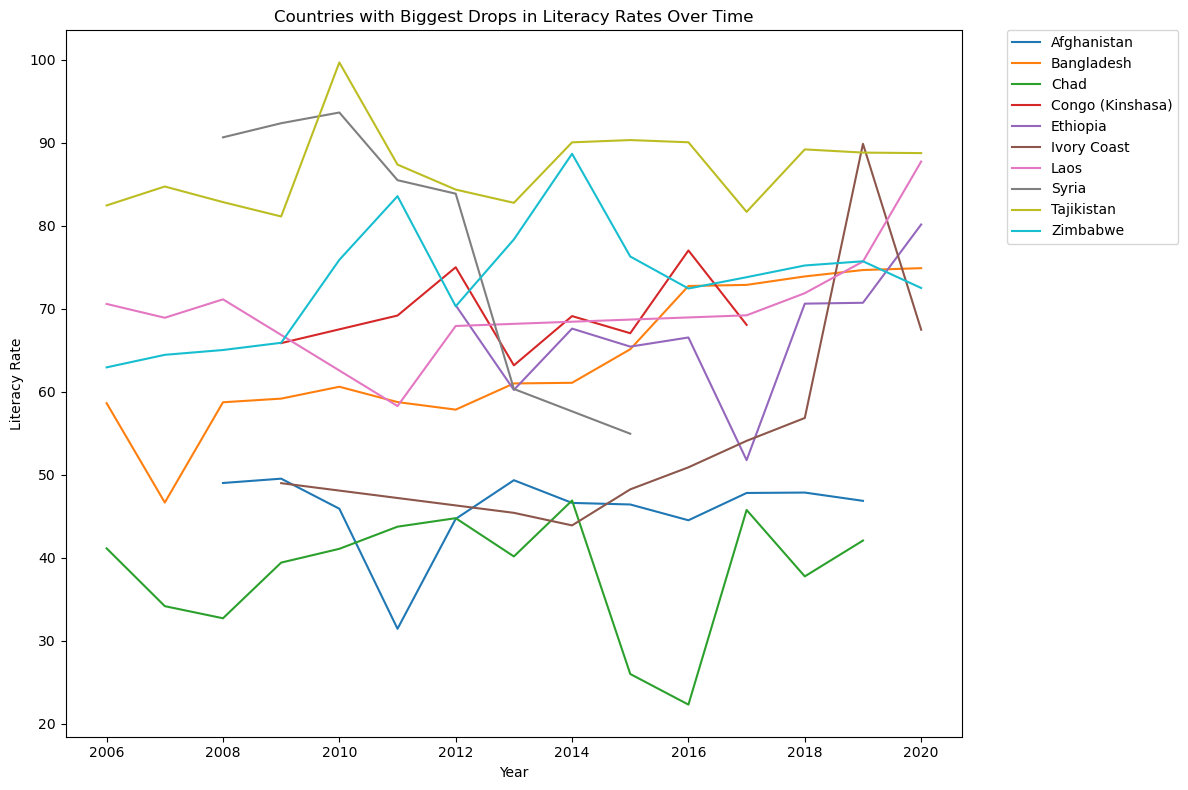

In [128]:
plt.figure(figsize=(12, 8))

for country in literacy_drop['country'].unique():
    country_df = literacy_drop[literacy_drop['country'] == country]
    plt.plot(country_df['year'], country_df['literacy_rate'], label=country)

plt.xlabel('Year')
plt.ylabel('Literacy Rate')
plt.title('Countries with Biggest Drops in Literacy Rates Over Time')

#Place the legend outside
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()  #Adjust the padding between and around subplots
plt.show()

Should we remove literacy rate altogether?

I think **YES!**

In [129]:
imputed_data = imputed_data.drop(columns = 'literacy_rate')

### Normalisation and PCA

In this project we will normalise the data across all years because we would like the countries to be in a comparable space throughout the years. This way we can later visualise a country's "history" through time.

In [130]:
imputed_data.columns

Index(['year', 'life_ladder', 'log_gdp_per_capita', 'social_suppoprt',
       'healthy_life_exp_at_birth', 'freedom_to_make_life_choices',
       'generosity', 'perceptions_of_corruption', 'positive_affect',
       'negative_affect', 'pop_density', 'suicide_rate', 'country', 'region',
       'continent'],
      dtype='object')

In [131]:
index_data = imputed_data.loc[:,['country', 'year']]

numeric_data = imputed_data.loc[:, 'life_ladder':'suicide_rate']

categorical_data = imputed_data.loc[:, ['region', 'continent']]

In [132]:
numeric_data.head()

,life_ladder,log_gdp_per_capita,social_suppoprt,healthy_life_exp_at_birth,freedom_to_make_life_choices,generosity,perceptions_of_corruption,positive_affect,negative_affect,pop_density,suicide_rate
0,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258,40.518221,4.6
1,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237,41.987193,4.4
2,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275,43.220447,4.3
3,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267,44.844851,4.1
4,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268,46.711251,4.0


In [133]:
categorical_data.head()

,region,continent
0,Southern Asia,Asia
1,Southern Asia,Asia
2,Southern Asia,Asia
3,Southern Asia,Asia
4,Southern Asia,Asia


#### Normalising the numeric data

In [134]:
from sklearn.preprocessing import StandardScaler

scaler_pca = StandardScaler()

scaled_pca = scaler_pca.fit_transform(numeric_data)
scaled_pca = pd.DataFrame(scaled_pca, columns=numeric_data.columns)

In [135]:
scaled_pca = scaled_pca.set_index(numeric_data.index)

In [136]:
scaled_pca.shape

(1910, 11)

In [137]:
scaled_pca.head()

,life_ladder,log_gdp_per_capita,social_suppoprt,healthy_life_exp_at_birth,freedom_to_make_life_choices,generosity,perceptions_of_corruption,positive_affect,negative_affect,pop_density,suicide_rate
0,-1.556735,-1.727824,-3.039409,-1.680436,-0.191927,1.033651,0.746118,-1.805031,-0.124686,-0.233009,-0.732908
1,-0.952888,-1.581200,-2.191728,-1.627341,-0.469443,1.170116,0.576264,-1.187511,-0.374575,-0.231203,-0.759226
2,-0.635825,-1.488914,-2.300836,-1.574246,-1.031589,0.742111,-0.182770,-0.869395,0.077605,-0.229688,-0.772385
3,-1.460547,-1.512201,-2.451907,-1.531770,-1.771630,0.996433,-0.055380,-0.934890,-0.017591,-0.227691,-0.798702
4,-1.504188,-1.438889,-2.451907,-1.489293,-1.522578,1.455452,0.183477,-0.008611,-0.005691,-0.225398,-0.811861


#### One-hot encoding the categorical data

In [138]:
cat_columns = ['region', 'continent']

encoder_pca = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoded_cat_pca = encoder_pca.fit_transform(categorical_data[cat_columns])

encoded_cat_pca = pd.DataFrame(encoded_cat_pca, columns=encoder_pca.get_feature_names_out(cat_columns))

/Users/khtamkivi/anaconda3/envs/python_env/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [139]:
encoded_cat_pca = encoded_cat_pca.set_index(categorical_data.index)

In [140]:
encoded_cat_pca.shape

(1910, 24)

In [141]:
encoded_cat_pca.head()

,region_Australia and New Zealand,region_Caribbean,region_Central America,region_Central Asia,region_Eastern Africa,region_Eastern Asia,region_Eastern Europe,region_Middle Africa,region_Northern Africa,region_Northern America,...,region_Southern Asia,region_Southern Europe,region_Western Africa,region_Western Asia,region_Western Europe,continent_Africa,continent_Americas,continent_Asia,continent_Europe,continent_Oceania
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


#### PCA

In [142]:
#Merging the processed data
data_pca = pd.concat([index_data, scaled_pca, encoded_cat_pca], axis=1)

In [143]:
data_pca.shape

(1910, 37)

In [144]:
data_pca.head()

,country,year,life_ladder,log_gdp_per_capita,social_suppoprt,healthy_life_exp_at_birth,freedom_to_make_life_choices,generosity,perceptions_of_corruption,positive_affect,...,region_Southern Asia,region_Southern Europe,region_Western Africa,region_Western Asia,region_Western Europe,continent_Africa,continent_Americas,continent_Asia,continent_Europe,continent_Oceania
0,Afghanistan,2008.0,-1.556735,-1.727824,-3.039409,-1.680436,-0.191927,1.033651,0.746118,-1.805031,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,Afghanistan,2009.0,-0.952888,-1.581200,-2.191728,-1.627341,-0.469443,1.170116,0.576264,-1.187511,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,Afghanistan,2010.0,-0.635825,-1.488914,-2.300836,-1.574246,-1.031589,0.742111,-0.182770,-0.869395,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,Afghanistan,2011.0,-1.460547,-1.512201,-2.451907,-1.531770,-1.771630,0.996433,-0.055380,-0.934890,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,Afghanistan,2012.0,-1.504188,-1.438889,-2.451907,-1.489293,-1.522578,1.455452,0.183477,-0.008611,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [156]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
principal_components = pca.fit_transform(data_pca.loc[:,'life_ladder':])

principal_data = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])

In [161]:
print("Variance explained")
print(f"PC1: {round(pca.explained_variance_ratio_[0]*100, 2)}%")
print(f"PC2: {round(pca.explained_variance_ratio_[1]*100, 2)}%")
print(f"PC3: {round(pca.explained_variance_ratio_[2]*100, 2)}%")

Variance explained
PC1: 35.44%
PC2: 14.0%
PC3: 9.77%


In [170]:
loadings = pca.components_

loadings_df = pd.DataFrame(loadings.T, columns=['PC{}'.format(i+1) for i in range(pca.n_components_)], index=data_pca.loc[:,'life_ladder':].columns)

#Displaying top 5 loadings for each PC
for i in range(pca.n_components_):
    print(f"Top 5 loadings for PC{i+1}:")
    print()
    top_indices = loadings_df.iloc[:, i].abs().sort_values(ascending=False).head(5).index
    top_loadings = loadings_df.loc[top_indices, loadings_df.columns[i]]
    print(top_loadings)
    print("\n")

Top 5 loadings for PC1:

life_ladder                    -0.424589
log_gdp_per_capita             -0.397493
healthy_life_exp_at_birth      -0.382368
social_suppoprt                -0.377116
freedom_to_make_life_choices   -0.318552
Name: PC1, dtype: float64


Top 5 loadings for PC2:

generosity                     -0.523216
suicide_rate                    0.441096
positive_affect                -0.334501
freedom_to_make_life_choices   -0.323860
perceptions_of_corruption       0.284723
Name: PC2, dtype: float64


Top 5 loadings for PC3:

pop_density                  0.650337
positive_affect             -0.371200
negative_affect              0.370410
perceptions_of_corruption   -0.290315
healthy_life_exp_at_birth    0.238012
Name: PC3, dtype: float64




In [202]:
#Since so many of the values are negative, we will multiply the values with -1
#This makes the graphs easier to interpret later on

loadings = pca.components_ * (-1)

principal_data = pd.DataFrame(data=principal_components * (-1), columns=['PC1', 'PC2', 'PC3'])

In [203]:
squared_loadings = pd.DataFrame(np.square(loadings).T, columns=['PC{}'.format(i+1) for i in range(pca.n_components_)], index=data_pca.loc[:,'life_ladder':].columns)

#Calculating the proportion of the variance explained by each variable for each PC
for pc in squared_loadings.columns:
    squared_loadings[pc] /= squared_loadings[pc].sum()

#Converting proportions to percentages
squared_loadings_percentage = squared_loadings * 100

#Displaying top 5 loadings as percentages for each PC
for i in range(pca.n_components_):
    print(f"Top 5 loadings as percentages for PC{i+1}:")
    print()
    top_loadings = squared_loadings_percentage.iloc[:, i].sort_values(ascending=False).head(5)
    print(top_loadings)
    print("\n")

Top 5 loadings as percentages for PC1:

life_ladder                     18.027557
log_gdp_per_capita              15.800066
healthy_life_exp_at_birth       14.620503
social_suppoprt                 14.221683
freedom_to_make_life_choices    10.147511
Name: PC1, dtype: float64


Top 5 loadings as percentages for PC2:

generosity                      27.375482
suicide_rate                    19.456529
positive_affect                 11.189108
freedom_to_make_life_choices    10.488552
perceptions_of_corruption        8.106736
Name: PC2, dtype: float64


Top 5 loadings as percentages for PC3:

pop_density                  42.293775
positive_affect              13.778935
negative_affect              13.720327
perceptions_of_corruption     8.428269
healthy_life_exp_at_birth     5.664983
Name: PC3, dtype: float64




In [204]:
final_data = pd.concat([imputed_data,principal_data], axis=1) 

In [205]:
final_data.head()

,year,life_ladder,log_gdp_per_capita,social_suppoprt,healthy_life_exp_at_birth,freedom_to_make_life_choices,generosity,perceptions_of_corruption,positive_affect,negative_affect,pop_density,suicide_rate,country,region,continent,PC1,PC2,PC3
0,2008.0,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258,40.518221,4.6,Afghanistan,Southern Asia,Asia,-3.904568,1.518750,-0.421507
1,2009.0,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237,41.987193,4.4,Afghanistan,Southern Asia,Asia,-3.042990,1.529349,-0.059121
2,2010.0,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275,43.220447,4.3,Afghanistan,Southern Asia,Asia,-2.923308,1.407980,-0.428443
3,2011.0,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267,44.844851,4.1,Afghanistan,Southern Asia,Asia,-3.564548,1.326709,-0.519432
4,2012.0,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268,46.711251,4.0,Afghanistan,Southern Asia,Asia,-3.195663,1.868513,-0.121373


In [238]:
#final_data.to_csv('data/final_data.csv')

In [2]:
final_data = pd.read_csv('data/final_data.csv')

#### Visualising the final data

In [26]:
def interactive_plot(year, x_axis, y_axis):
    # Filter the data for the selected year
    filtered_data = final_data[final_data['year'] == year]
    print(f"{filtered_data.shape[0]} countries")

    #Create the plot
    fig = px.scatter(filtered_data, x=x_axis, y=y_axis, color='continent', hover_name='country')

    fig.update_layout(
        plot_bgcolor='white', 
        width=1000,  
        height=700,  
        legend=dict(
            orientation="h", 
            yanchor="bottom",
            y=-0.15,  
            xanchor="center",
            x=0.5
        ),
        xaxis=dict(
            showgrid=True,  # Enable x-axis gridlines
            gridcolor='LightGrey',
            zeroline=True,  # Show the zero line for the y-axis
            zerolinecolor='LightGrey', 
            zerolinewidth=1
        ),
        yaxis=dict(
            showgrid=True,  # Enable y-axis gridlines
            gridcolor='LightGrey',
            zeroline=True,  # Show the zero line for the y-axis
            zerolinecolor='LightGrey',  
            zerolinewidth=1
        )
    )
    
    fig.show()

In [27]:
index_life_ladder = final_data.columns.get_loc('life_ladder')
index_country = final_data.columns.get_loc('country')
index_PC1 = final_data.columns.get_loc('PC1')

plotting_variables = final_data.columns[index_life_ladder:index_country].tolist() + final_data.columns[index_PC1:].tolist()

In [28]:
#Slider for year selection
year_slider = widgets.IntSlider(value=2019, min=final_data['year'].min(), max=final_data['year'].max(), step=1, description='Year:')

#Dropdown for selecting x and y axis variables
variables = plotting_variables 
x_axis_dropdown = widgets.Dropdown(options=variables, value='PC1', description='X Axis:')
y_axis_dropdown = widgets.Dropdown(options=variables, value='PC2', description='Y Axis:')

#Display the interactive widgets
interact(interactive_plot, year=year_slider, x_axis=x_axis_dropdown, y_axis=y_axis_dropdown)

interactive(children=(IntSlider(value=2019, description='Year:', max=2020, min=2005), Dropdown(description='X …

<function __main__.interactive_plot(year, x_axis, y_axis)>